In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection
import pandas as pd

In [20]:
data = pd.read_csv('data.csv')

x = data.drop(columns = ['Unnamed: 0','y'])
y = data['y']

x = x.to_numpy()
y = y.to_numpy()

print('Instancias:', np.shape(x)[0])
print('Dimensiones:', np.shape(x)[1])
print('Instancias/Dimensiones:', int(np.shape(x)[0]/np.shape(x)[1]))
print('Clases: ', np.unique(y, return_counts=True)[0], 'Instancias por clase:', np.unique(y, return_counts=True)[1])

Instancias: 11500
Dimensiones: 178
Instancias/Dimensiones: 64
Clases:  [1 2 3 4 5] Instancias por clase: [2300 2300 2300 2300 2300]


In [21]:
scaler = sklearn.preprocessing.StandardScaler()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.5)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
N = np.shape(x_train)[0]
data = np.array([0.1*N,0.2*N,0.3*N,0.4*N,0.5*N,0.6*N,0.7*N,0.8*N,0.9*N,N]).astype(int)
print('N =', N)

N = 5750


In [23]:
f1_soft1 = []
f1_soft2 = []
for element in data:
    mlp = sklearn.neural_network.MLPClassifier(activation = 'logistic', hidden_layer_sizes = (4,4,4), max_iter = 3000)
    mlp.fit(x_train[0:element],y_train[0:element])
    f1_soft1.append(sklearn.metrics.f1_score(y_train[0:element],
                                            mlp.predict(x_train[0:element]),average = 'macro'))
    f1_soft2.append(sklearn.metrics.f1_score(y_test[0:element],
                                            mlp.predict(x_test[0:element]),average = 'macro'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

In [24]:
f1_relu1 = []
f1_relu2 = []
for element in data:
    mlp = sklearn.neural_network.MLPClassifier(activation = 'relu', hidden_layer_sizes = (4,4,4), max_iter = 3000)
    mlp.fit(x_train[0:element],y_train[0:element])
    f1_relu1.append(sklearn.metrics.f1_score(y_train[0:element],
                                            mlp.predict(x_train[0:element]),average = 'macro'))
    f1_relu2.append(sklearn.metrics.f1_score(y_test[0:element],
                                            mlp.predict(x_test[0:element]),average = 'macro'))

In [25]:
alpha = np.logspace(-7,5,10)
f1_alpha1 = []
f1_alpha2 = []
for element in alpha:
    mlp = sklearn.neural_network.MLPClassifier(activation = 'relu', hidden_layer_sizes = (4,4,4), 
                                               max_iter = 3000, alpha = element)
    mlp.fit(x_train,y_train)
    f1_alpha1.append(sklearn.metrics.f1_score(y_train,mlp.predict(x_train),average = 'macro'))
    f1_alpha2.append(sklearn.metrics.f1_score(y_test,mlp.predict(x_test),average = 'macro'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

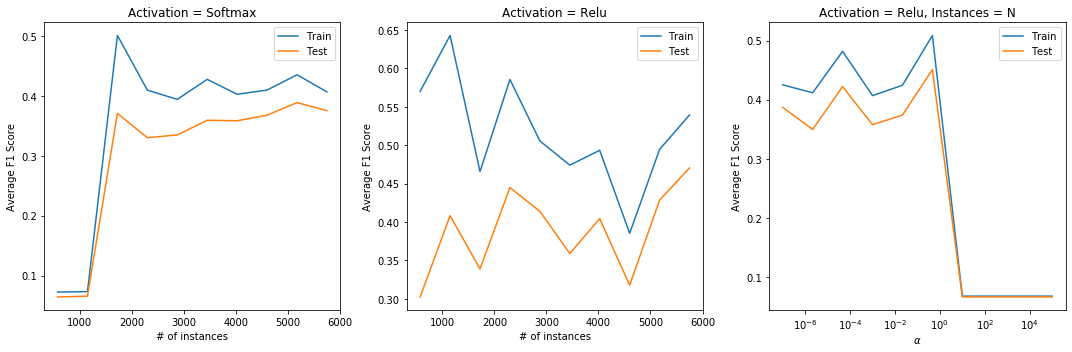

In [26]:
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.plot(data,f1_soft1, label = 'Train')
plt.plot(data,f1_soft2, label = 'Test')
plt.xlabel('# of instances')
plt.ylabel('Average F1 Score')
plt.title('Activation = Softmax')
plt.legend()

plt.subplot(132)
plt.plot(data,f1_relu1, label = 'Train')
plt.plot(data,f1_relu2, label = 'Test')
plt.xlabel('# of instances')
plt.ylabel('Average F1 Score')
plt.title('Activation = Relu')
plt.legend()

plt.subplot(133)
plt.semilogx(alpha,f1_alpha1, label = 'Train')
plt.semilogx(alpha,f1_alpha2, label = 'Test')
plt.xlabel(r'$\alpha$')
plt.ylabel('Average F1 Score')
plt.title('Activation = Relu, Instances = N')
plt.legend()

plt.tight_layout()

In [27]:
print('Max F1 Score (Activation = Softmax): {:.3f} with {} = {:.1f}N instances'.format(
    max(f1_soft2),data[np.argmax(f1_soft2)],data[np.argmax(f1_soft2)]/N))
print('Max F1 Score (Activation = Relu): {:.3f} with {} = {:.1f}N instances'.format(
    max(f1_relu2),data[np.argmax(f1_relu2)],data[np.argmax(f1_relu2)]/N))
print('Max F1 Score (Activation = Relu, Instances = N): {:.3f} with alpha = {:.7f}'.format(
    max(f1_alpha2),alpha[np.argmax(f1_alpha2)]))

Max F1 Score (Activation = Softmax): 0.389 with 5175 = 0.9N instances
Max F1 Score (Activation = Relu): 0.470 with 5750 = 1.0N instances
Max F1 Score (Activation = Relu, Instances = N): 0.451 with alpha = 0.4641589


De las gráficas presentadas anteriormente se pueden concluir bastantes cosas.

Primero que todo, se ver que la función de activación ReLu tiene mejores resutados que la función softmax. Esto, debido a que (si hacer ninguna variación de alpha) se encuentra que el F1 score máximo para test haciendo uso de ReLu es mayor que aquel encontrado para softmax.

Ahora bien, se ve que los mejores resultados, tanto para la función de softmax como para la función de ReLu (sin variar alpha), se dan para un número grande de instancias. Para ambas funciones se ve que el máximo se encuentra para **0.9N** y para **1N** en el caso de softmax y ReLu respectivamente. Esto significa que entre más instancias se obtengan, es posible que se den mejores resultados.

Aun así, el mayor valor de F1 score se encuentra cuando se hace uso de todas las instancias y se aplica un alpha más o menos de **1e-1**. Esto quiere decir que, entre más instancias se tengan, es posible que el despemeño de la red sea mejor. Y, haciendo uso de una regularización 'penalty' de valores bajos, con el fin de no obtener un overfitting, se encuentran los mejores resultados.

Por último, se debe mencionar que los **warnings** que aparecen, se deben a que en algunas configuraciones de las redes hay labels en y_true que no aparecen en predict(x). Por esta razón, para estos casos F1 score = 0. Esto es importante saber, porque quiere decir que alguna configuración no está llevando a cabo un buen trabajo en la predicción. Y esta puede ser una de las razones por las cuales el promedio de F1 score tiene esos valles que se pueden apreciar en las gráficas presentadas anteriormente para las diferentes funciones de activación.